Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 19 mins
H2O_cluster_timezone:,Europe/Istanbul
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,8 days
H2O_cluster_name:,H2O_from_python_deniz_jlepsa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.526 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


d:\users\deniz\appdata\local\programs\python\python39\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       723
           1       1.00      1.00      1.00        31

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754



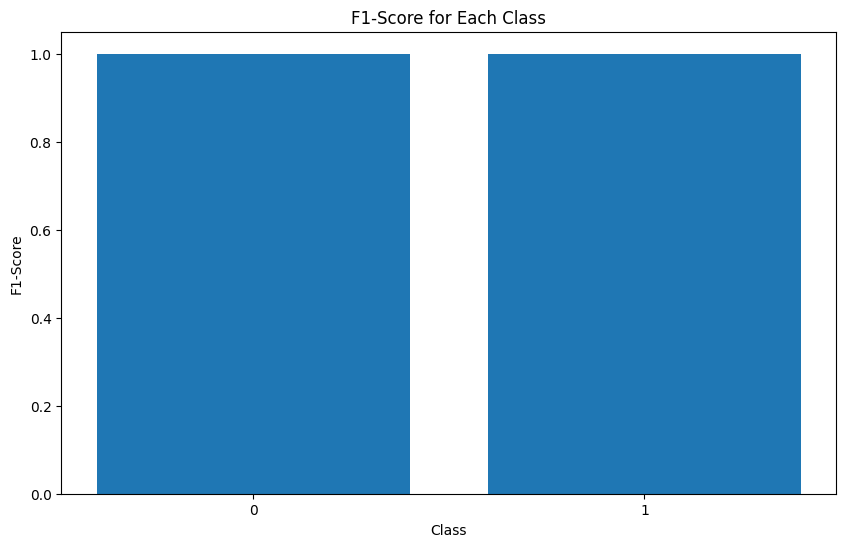

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import h2o

# Initialize H2O
h2o.init()

# Load the test data
test_data_path = "data/bank_transactions_data_2_test.csv"
test_df = pd.read_csv(test_data_path)

# Preprocess the test data
selected_columns = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
X_test = test_df[selected_columns]
y_test = (test_df["TransactionAmount"] > 1000).astype(int)
y_test.name = "HighTransaction"  # Rename the target column

# Load the model
model_path = "models/model_weight_5.00.zip/StackedEnsemble_AllModels_1_AutoML_20_20241110_210138"  # Adjust the path as needed
model = h2o.load_model(model_path)

# Convert test data to H2OFrame
test_data = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))
test_data['HighTransaction'] = test_data['HighTransaction'].asfactor()

# Make predictions
predictions = model.predict(test_data).as_data_frame()
y_pred = predictions['predict'].astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
print("Accuracy Score:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the results
class_labels = ['0', '1']
f1_scores = [report[label]['f1-score'] for label in class_labels]
plt.figure(figsize=(10, 6))
plt.bar(class_labels, f1_scores)
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score for Each Class')
plt.show()
